<a href="https://colab.research.google.com/github/Khaoula-fatteh/Ecommerce/blob/main/RapportAnalyse_PP_OCR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Install Dependencies***

In [1]:
!python3 -m pip install paddlepaddle

In [2]:
!pip install "paddleocr>=2.0.1"

In [3]:
from paddleocr import PaddleOCR,draw_ocr
# Paddleocr supports Chinese, English, French, German, Korean and Japanese.
# You can set the parameter `lang` as `ch`, `en`, `fr`, `german`, `korean`, `japan`
# to switch the language model in order.
ocr = PaddleOCR(use_angle_cls=True, lang='fr', use_gpu=False)
 # need to run only once to download and load model into memory

[2023/07/07 22:33:28] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/latin/latin_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/usr

## ***pdf2image***

In [4]:
!pip install pdf2image
!apt-get update
!apt-get install poppler-utils

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Hit:2 http://security.ubuntu.com/ubuntu focal-security InRelease
Hit:3 http://archive.ubuntu.com/ubuntu focal-updates InRelease
Hit:4 http://archive.ubuntu.com/ubuntu focal-backports InRelease
Hit:5 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Hit:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease
Hit:10 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:11 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Reading package lists... Done
Reading package lists... Done
Building dependency tree       
Reading state information... Done
poppler-utils is already the newest version (0.86.1-0ubuntu1.1).
0 upgraded, 0 newly installed, 0 to re

In [5]:
#converstion
from pdf2image import convert_from_path

In [6]:
images = convert_from_path('/content/Rapport.pdf')

In [7]:
!mkdir pages

mkdir: cannot create directory ‘pages’: File exists


In [8]:
for i in range(len(images)):
  images[i].save('pages/page'+str(i)+'.jpg', 'JPEG')

## ***Read Images***

In [7]:
from google.colab.patches import cv2_imshow
import cv2

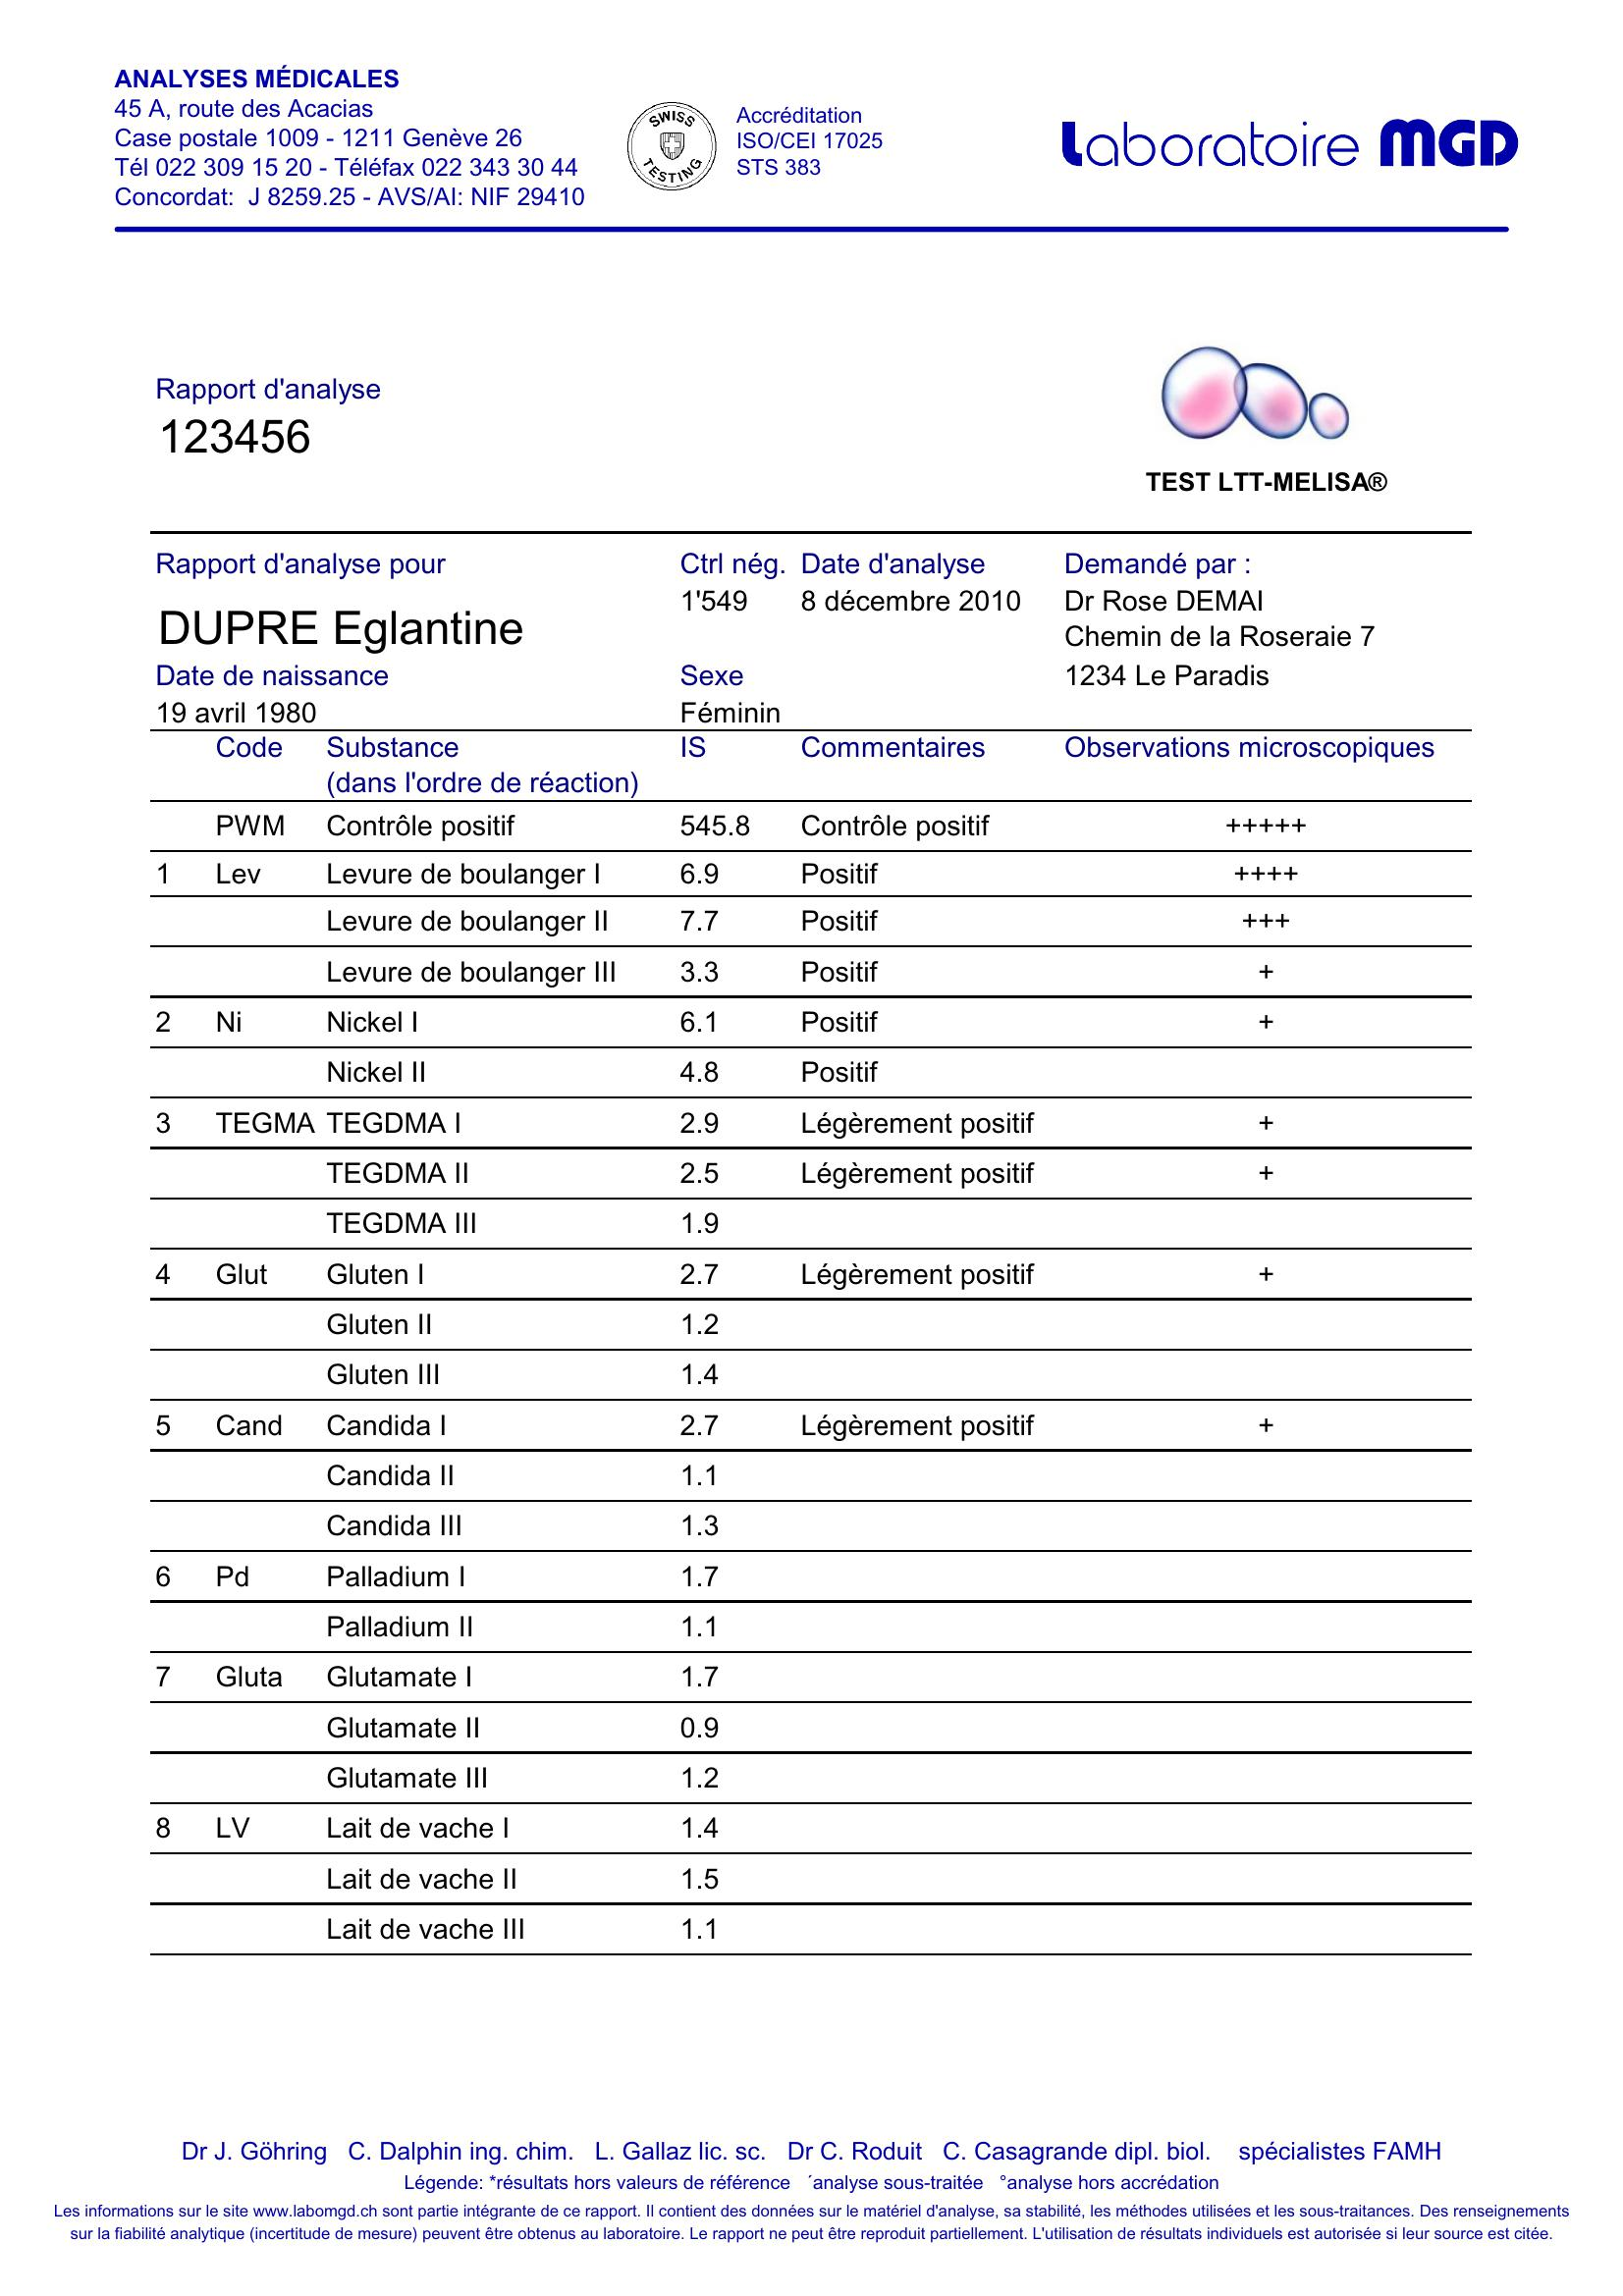

In [8]:

img_path = '/content/pages/page0.jpg'

img = cv2.imread(img_path, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [9]:
result = ocr.ocr(img_path)
for line in result:
    print(line)

[2023/07/07 22:34:05] ppocr DEBUG: dt_boxes num : 116, elapse : 1.0153617858886719
[2023/07/07 22:34:06] ppocr DEBUG: cls num  : 116, elapse : 1.015573501586914
[2023/07/07 22:34:23] ppocr DEBUG: rec_res num  : 116, elapse : 16.576337337493896
[[[[116.0, 63.0], [408.0, 63.0], [408.0, 95.0], [116.0, 95.0]], ('ANALYSES MÉDICALES', 0.9664614200592041)], [[[113.0, 92.0], [384.0, 95.0], [384.0, 127.0], [113.0, 124.0]], ('45 A, route des Acacias', 0.9975342154502869)], [[[748.0, 100.0], [881.0, 100.0], [881.0, 127.0], [748.0, 127.0]], ('Accréditation', 0.9960480332374573)], [[[116.0, 129.0], [536.0, 129.0], [536.0, 153.0], [116.0, 153.0]], ('Case postale 1009 - 1211 Genéve 26', 0.9689648747444153)], [[[750.0, 129.0], [903.0, 129.0], [903.0, 156.0], [750.0, 156.0]], ('ISO/CEI 17025', 0.9898322224617004)], [[[1077.0, 120.0], [1544.0, 114.0], [1545.0, 173.0], [1078.0, 178.0]], ('laboratoire MGD', 0.9367733597755432)], [[[116.0, 158.0], [590.0, 158.0], [590.0, 183.0], [116.0, 183.0]], ('Tél 022 

In [14]:
result

[[[116.0, 63.0], [408.0, 63.0], [408.0, 95.0], [116.0, 95.0]],
 ('ANALYSES MÉDICALES', 0.9664614200592041)]

In [9]:
from paddleocr import PaddleOCR
import cv2
import numpy as np

# I declare the PaddleOCR class
ocr = PaddleOCR()

img_path = '/content/pages/page0.jpg'

# I perform prediction
result = ocr.ocr(img_path)
print(result)

image = cv2.imread(img_path)
Index = 1
for row in result[0]:
    bbox = [[int(r[0]), int(r[1])] for r in row[0]]

    # I write text output on image at each line
    cv2.putText(image, str(Index), tuple(bbox[0]), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.8, (255, 0, 0), 1)
    cv2.polylines(image, [np.array(bbox)], True, (255, 0, 0), 1)
    Index += 1

# save image
cv2.imwrite("out_with_text.jpg", image)

[2023/07/07 22:17:19] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ch/ch_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/ch/ch_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/usr/local

True

In [11]:
# draw result
from PIL import Image
import cv2
import numpy as np

result = result[0]
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path='/content/Humor-Sans.ttf')

# Convert PIL image to OpenCV image for drawing bounding boxes
im_show_cv = np.array(im_show)
im_show_cv = cv2.cvtColor(im_show_cv, cv2.COLOR_RGB2BGR)

Index = 1
for row in result:
    bbox = [[int(r[0]), int(r[1])] for r in row[0]]

    # write text output on image at each line
    cv2.putText(im_show_cv, str(Index), tuple(bbox[0]), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.8, (255, 0, 0), 1)
    cv2.polylines(im_show_cv, [np.array(bbox)], True, (255, 0, 0), 1)
    Index += 1

# Save the modified image with the same filename
cv2.imwrite('result.jpg', im_show_cv)

True

In [10]:
from paddleocr import PaddleOCR
import cv2
import numpy as np

# Initialize the PaddleOCR class
ocr = PaddleOCR()

img_path = '/content/pages/page0.jpg'

# Perform prediction
result = ocr.ocr(img_path)
print(result)

image = cv2.imread(img_path)
Index = 1
for row in result[0]:
    bbox = [[int(r[0]), int(r[1])] for r in row[0]]
    text = row[1][0]  # Extracted text from OCR

    # Draw bounding box on the image
    cv2.putText(image, str(Index), tuple(bbox[0]), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.8, (255, 0, 0), 1)
    cv2.polylines(image, [np.array(bbox)], True, (255, 0, 0), 1)

    # Show extracted text next to the bounding box
    cv2.putText(image, text, (bbox[0][0], bbox[0][1] + 20), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.8, (0, 0, 255), 1)

    Index += 1

# Save the image with bounding boxes and extracted text
cv2.imwrite("out_with_text.jpg", image)


[2023/07/07 22:34:23] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ch/ch_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/ch/ch_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/usr/local

True

In [12]:
from paddleocr import PaddleOCR
import cv2
import numpy as np

# Initialize the PaddleOCR class
ocr = PaddleOCR()

img_path = '/content/pages/page0.jpg'

# Perform prediction
result = ocr.ocr(img_path)
print(result)

# Load the source image
image = cv2.imread(img_path)

# Get the dimensions of the source image
height, width, _ = image.shape

# Create a blank canvas to combine the image and extracted text
combined_image = np.ones((height, width + 400, 3), np.uint8) * 255

# Place the source image on the canvas
combined_image[:, :width, :] = image

# Add the extracted text beside the image
for idx, row in enumerate(result[0]):
    bbox = [[int(r[0]), int(r[1])] for r in row[0]]
    text = row[1][0]  # Extracted text from OCR

    # Draw bounding box on the canvas
    cv2.putText(combined_image, str(idx+1), tuple(bbox[0]), cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.8, (255, 0, 0), 1)
    cv2.polylines(combined_image, [np.array(bbox)], True, (255, 0, 0), 1)

    # Add the extracted text beside the image
    text_start = (width + 10, (idx+1) * 30)
    cv2.putText(combined_image, f'{idx+1}. {text}', text_start, cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0, 0, 0), 1)

# Save the combined image with the source image and extracted text
cv2.imwrite("combined_image.jpg", combined_image)


[2023/07/07 22:41:28] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ch/ch_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/ch/ch_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/usr/local

True

In [16]:
from paddleocr import PaddleOCR
import cv2
import numpy as np

# Initialize the PaddleOCR class
ocr = PaddleOCR()

img_path = '/content/pages/page0.jpg'

# Perform prediction
result = ocr.ocr(img_path)
print(result)

# Load the source image
image = cv2.imread(img_path)

# Get the dimensions of the source image
height, width, _ = image.shape

# Calculate the maximum width required for the extracted text
max_text_width = max([cv2.getTextSize(row[1][0], cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, 1)[0][0] for row in result[0]])

# Calculate the height required for the extracted text region
text_region_height = len(result) * 30

# Create a blank canvas to combine the image and extracted text
combined_image = np.ones((max(height, text_region_height), width + max_text_width + 20, 3), np.uint8) * 255

# Place the source image on the canvas
combined_image[:height, :width, :] = image

# Define the font properties for the extracted text
font_face = cv2.FONT_HERSHEY_COMPLEX_SMALL
font_scale = 1
font_thickness = 1

# Define the starting position for the extracted text
text_start = (width + 10, 30)

# Calculate the number of visible text lines in the scrolling text region
num_visible_lines = min(len(result[0]), (combined_image.shape[0] - text_start[1]) // 30)

# Add the extracted text to the combined image
for idx, row in enumerate(result[0]):
    bbox = [[int(r[0]), int(r[1])] for r in row[0]]
    text = row[1][0]  # Extracted text from OCR

    # Draw bounding box on the canvas
    cv2.putText(combined_image, str(idx + 1), tuple(bbox[0]), font_face, font_scale, (255, 0, 0), font_thickness)
    cv2.polylines(combined_image, [np.array(bbox)], True, (255, 0, 0), font_thickness)

    # Calculate the position for the extracted text
    current_text_start = (text_start[0], text_start[1] + (idx % num_visible_lines) * 30)

    # Add the extracted text to the combined image
    cv2.putText(combined_image, f'{idx + 1}. {text}', current_text_start, font_face, font_scale, (0, 0, 0), font_thickness)

# Save the combined image with the source image and extracted text
cv2.imwrite("combined_image22.jpg", combined_image)


[2023/07/07 23:06:07] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/ch/ch_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/ch/ch_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/usr/local

True

In [20]:
import cv2
import numpy as np

image = cv2.imread(img_path)
for row in result[0]:
    bbox = [[int(r[0]), int(r[1])] for r in row[0]]

    # write text output on image at each line
    cv2.putText(image, row[1][0], bbox[0], cv2.FONT_HERSHEY_COMPLEX_SMALL, 0.8, (255, 0, 0), 1)
    cv2.polylines(image, [np.array(bbox)], True, (255, 0, 0), 1)

# save image
cv2.imwrite("out_with_text.jpg", image)

TypeError: ignored

In [18]:
# draw result
from PIL import Image
result = result[0]
image = Image.open(img_path).convert('RGB')
boxes = [line[0] for line in result]
txts = [line[1][0] for line in result]
scores = [line[1][1] for line in result]
im_show = draw_ocr(image, boxes, txts, scores, font_path='/content/Humor-Sans.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result.jpg')


## ***Image 2 ***

In [ ]:
img_path2 = '/content/pages/page1.jpg'

img = cv2.imread(img_path2, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
result2 = ocr.ocr(img_path2)
for line in result2:
    print(line)

In [ ]:
result2

In [ ]:
# draw result
from PIL import Image
result2 = result2[0]
image = Image.open(img_path2).convert('RGB')
boxes = [line[0] for line in result2]
txts = [line[1][0] for line in result2]
scores = [line[1][1] for line in result2]
im_show = draw_ocr(image, boxes, txts, scores, font_path='/content/Humor-Sans.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result2.jpg')


## ***Image3***

In [ ]:
img_path3 = '/content/pages/page2.jpg'

img = cv2.imread(img_path3, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
result3 = ocr.ocr(img_path3)
for line in result3:
    print(line)

In [ ]:
result3

In [ ]:
# draw result
from PIL import Image
result3 = result3[0]
image = Image.open(img_path3).convert('RGB')
boxes = [line[0] for line in result3]
txts = [line[1][0] for line in result3]
scores = [line[1][1] for line in result3]
im_show = draw_ocr(image, boxes, txts, scores, font_path='/content/Humor-Sans.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result3.jpg')

## ***Image4***

In [ ]:
img_path4 = '/content/pages/page3.jpg'

img = cv2.imread(img_path4, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
result4 = ocr.ocr(img_path4)
for line in result4:
    print(line)

In [ ]:
result4

In [ ]:
# draw result
from PIL import Image
result4 = result4[0]
image = Image.open(img_path4).convert('RGB')
boxes = [line[0] for line in result4]
txts = [line[1][0] for line in result4]
scores = [line[1][1] for line in result4]
im_show = draw_ocr(image, boxes, txts, scores, font_path='/content/Humor-Sans.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result4.jpg')

## ***Image5***

In [ ]:
img_path5 = '/content/pages/page4.jpg'

img = cv2.imread(img_path5, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
result5 = ocr.ocr(img_path5)
for line in result5:
    print(line)

In [ ]:
result5

In [ ]:
# draw result
from PIL import Image
result5 = result5[0]
image = Image.open(img_path5).convert('RGB')
boxes = [line[0] for line in result5]
txts = [line[1][0] for line in result5]
scores = [line[1][1] for line in result5]
im_show = draw_ocr(image, boxes, txts, scores, font_path='/content/Humor-Sans.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result5.jpg')

## ***Image6***

In [ ]:
img_path6 = '/content/pages/page5.jpg'

img = cv2.imread(img_path6, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
result6 = ocr.ocr(img_path6)
for line in result6:
    print(line)

In [ ]:
result6

In [ ]:
# draw result
from PIL import Image
result6 = result6[0]
image = Image.open(img_path6).convert('RGB')
boxes = [line[0] for line in result6]
txts = [line[1][0] for line in result6]
scores = [line[1][1] for line in result6]
im_show = draw_ocr(image, boxes, txts, scores, font_path='/content/Humor-Sans.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result6.jpg')

# ***Image7***

In [ ]:
img_path7 = '/content/pages/page6.jpg'

img = cv2.imread(img_path7, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
result7=ocr.ocr(img_path7)
for line in result7
  print (line)

## ***Image8***

In [ ]:
img_path8 = '/content/pages/page7.jpg'

img = cv2.imread(img_path8, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
result8=ocr.ocr(img_path8)
for line in result8:
  print (line)

In [ ]:
result8

In [ ]:
# draw result
from PIL import Image
result8 = result8[0]
image = Image.open(img_path8).convert('RGB')
boxes = [line[0] for line in result8]
txts = [line[1][0] for line in result8]
scores = [line[1][1] for line in result8]
im_show = draw_ocr(image, boxes, txts, scores, font_path='/content/Humor-Sans.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result81.jpg')

## ***Image9***

In [ ]:
img_path9 = '/content/pages/page8.jpg'

img = cv2.imread(img_path9, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
result9=ocr.ocr(img_path9)
for line in result9:
  print (line)

In [ ]:
result9

In [ ]:
# draw result
from PIL import Image
result9 = result9[0]
image = Image.open(img_path9).convert('RGB')
boxes = [line[0] for line in result9]
txts = [line[1][0] for line in result9]
scores = [line[1][1] for line in result9]
im_show = draw_ocr(image, boxes, txts, scores, font_path='/content/Humor-Sans.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result91.jpg')

## ***Image10***

In [ ]:
img_path10 = '/content/pages/page9.jpg'

img = cv2.imread(img_path10, cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
result10=ocr.ocr(img_path10)
for line in result10:
  print (line)

In [ ]:
result10

In [ ]:
# draw result
from PIL import Image
result10 = result10[0]
image = Image.open(img_path10).convert('RGB')
boxes = [line[0] for line in result10]
txts = [line[1][0] for line in result10]
scores = [line[1][1] for line in result10]
im_show = draw_ocr(image, boxes, txts, scores, font_path='/content/Humor-Sans.ttf')
im_show = Image.fromarray(im_show)
im_show.save('result10.jpg')